Introdução

Nesse notebook uso técnicas como arima, auto_arima e decomposição de tendência e sazonalidade para detecção de anomalias nos dados,
desconsiderando a tendência e a sazonalidade na busca por anormalidades para preservação de ambos..
Com posterior visualização
gráfica dos dados decompostos e separados por tendência, sazonalidade, resíduos e com anomalias detectadas e marcadas no gráfico para posterior tomada de decisão..

In [1]:
#importação das Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

In [110]:
dataset = pd.read_csv("Salestrain.csv")
dataset

,data
0,112
1,118
2,132
3,129
4,121
...,...
91,405
92,355
93,306
94,271


In [112]:
#Transformação dos dados para um array
data = dataset['data'].values
data

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306], dtype=int64)

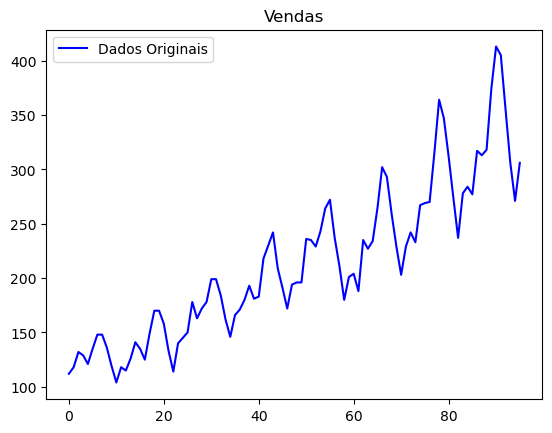

In [114]:
#Visualização dos dados originais
plt.plot(data, color = 'blue', label = "Dados Originais")
plt.title("Vendas")
plt.legend()
plt.show()

In [116]:
#Usando auto-arima para escolha dos melhores parâmetros
arima = auto_arima(data, m = 12, seasonal = True, trace = False)

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [122]:
arima.order

(1, 1, 0)

In [168]:
#Criação do modelo
arima_model = ARIMA(data, order=(1,1,0))
arima_fitted = arima_model.fit()

In [317]:
arima_fitted.resid.size

96

In [319]:
resid = arima_fitted.resid

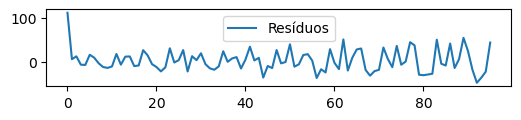

In [321]:
#Visualização dos resíduos
plt.figure(figsize=(6,1))
plt.plot(resid, label = "Resíduos")
plt.legend(loc = 'best')
plt.show()

In [335]:
#filtro do numpy para detecção de anomalias
anomalies = np.where(np.abs(resid) > 2.0 * resid.std())[0]

In [337]:
anomalies

array([ 0, 62, 83, 89], dtype=int64)

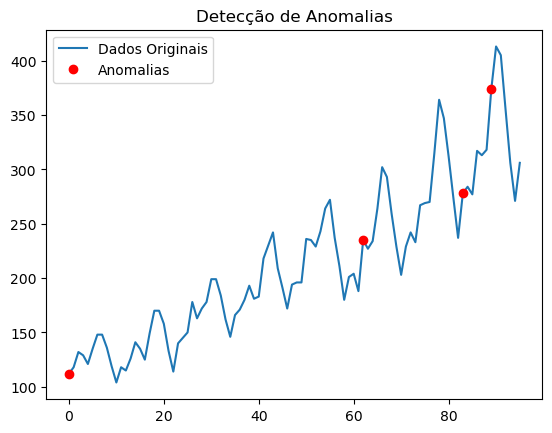

In [341]:
#Visualização gráfica das anomalias
plt.plot(data, label = "Dados Originais")
plt.plot(anomalies, data[anomalies], "ro", label = "Anomalias")
plt.title("Detecção de Anomalias")
plt.legend()
plt.show()

Decomposiçao de série Temporal para Detecção de Anomalias

In [235]:
model = STL(data, period = 12)
decomp = model.fit()

In [344]:
#Criação de variáveis com tendência, sazonalidade e anomalias para posteriror visualização gráfica
residuos = decomp.resid
tendencia = decomp.trend
sazonal = decomp.seasonal

In [346]:
#Separação das anomalias
std_anomalies = np.where(np.abs(decomp.resid) > 3 * np.std(decomp.resid))[0]
std_anomalies

array([51, 61], dtype=int64)

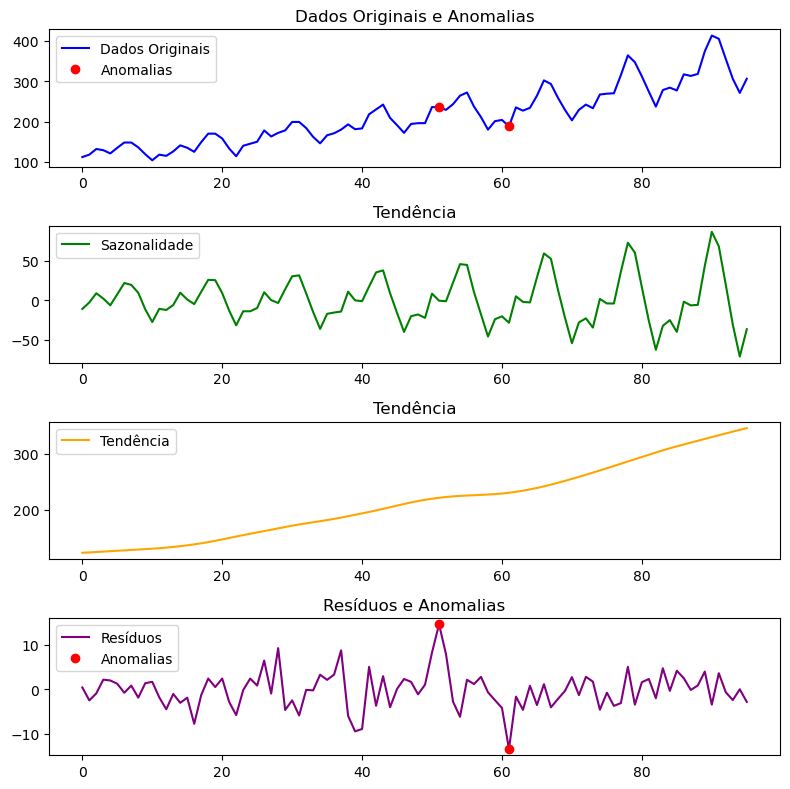

In [348]:
#Visualização gráfica dos dados originais, tendência, sazonalidade, resíduos e anomalias
plt.figure(figsize=(8,8))

plt.subplot(411)
plt.plot(data, color = "blue", label = "Dados Originais")
plt.plot(std_anomalies, data[std_anomalies], "ro", markersize = 6, label = "Anomalias")
plt.title("Dados Originais e Anomalias")
plt.legend()

plt.subplot(412)
plt.plot(sazonal, color = "green", label = "Sazonalidade")
plt.title("Tendência")
plt.legend()

plt.subplot(413)
plt.plot(tendencia, color = "orange", label = "Tendência")
plt.title("Tendência")
plt.legend()


plt.subplot(414)
plt.plot(residuos, color = "purple", label = "Resíduos")
plt.plot(std_anomalies, residuos[std_anomalies], "ro", markersize = 6, label = "Anomalias")
plt.title("Resíduos e Anomalias")
plt.legend(loc = "upper left")

plt.tight_layout()
plt.show()